# Chapter 3:
## Derivación:
**Problema: 8.**

<IPython.core.display.Javascript object>


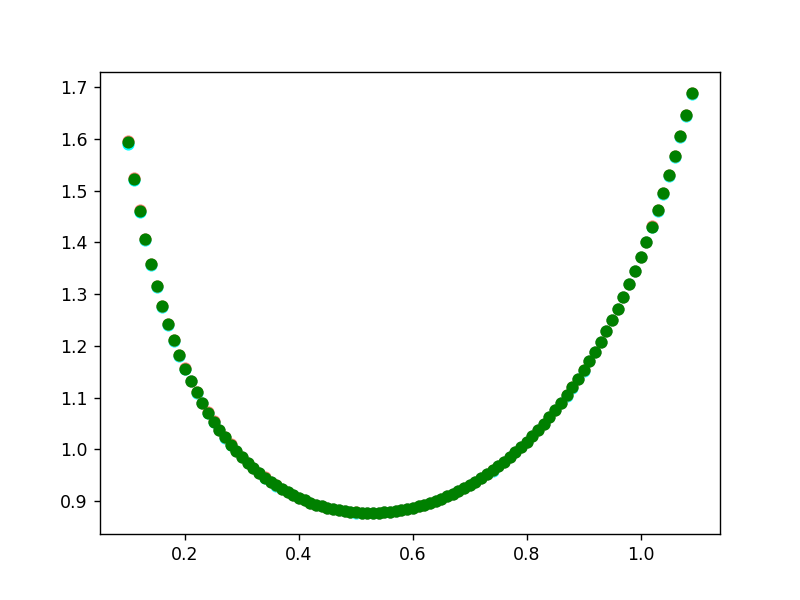

In [72]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.01
x = np.arange(0.1,1.1,h)

def function(x):
    return np.sqrt(np.tan(x))

def derivative_prog(f,x):
    Dev = np.zeros_like(x)
    h = x[1] - x[0]
    for i in range(len(x)):
        Dev[i] = (-3*f(x[i]) + 4*f(x[i]+h)-f(x[i]+2*h))/(2*h)
    return Dev

def derivative_cent(f,x):
    Dev = np.zeros_like(x)
    h = x[1] - x[0]
    for i in range(len(x)):
        Dev[i] = (f(x[i]+h)-f(x[i]-h))/(2*h)
    return Dev

def derivative_real(x):
    Dev = np.zeros_like(x)
    for i in range(len(x)):
        Dev[i] = 1/(2*np.sqrt(np.tan(x[i]))*np.cos(x[i])**2) 
    return Dev

fig, ax = plt.subplots()
prog = derivative_prog(function,x)
cent = derivative_cent(function,x)
real = derivative_real(x)
ax.scatter(x,prog,color='cyan')
ax.scatter(x,cent,color='salmon')
ax.scatter(x,real,color='g')
plt.show()



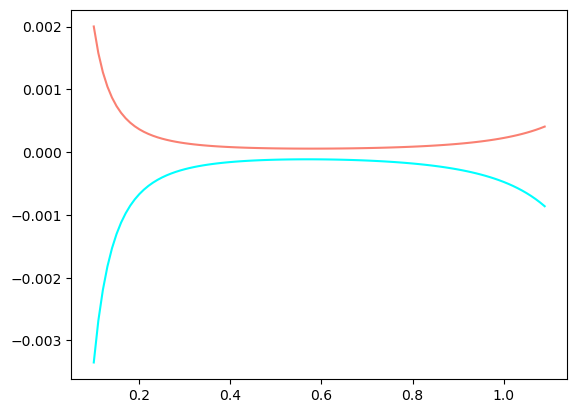

In [4]:
def err(y_given,y_real):
    return y_given - y_real

plt.plot(x,err(prog,real),color='cyan')
plt.plot(x,err(cent,real),color='salmon')
plt.show()

En efecto, ambas aproximaciones tienen el mismo orden de magnitud en sus estimaciones. Sin embargo, una sobreestima y otra subestima los valores de la derivada en cada punto.

# Raíces de polinomios



In [89]:
import sympy as sym

x = sym.Symbol('x')
n = 20

def Laguerre(n, x):
    coeff = sym.exp(x)/sym.factorial(n)
    dev = sym.exp(-x)*x**n
    polimonios = np.zeros(n)
    for i in range(1,n+1):
        dev = sym.diff(dev)
    return sym.simplify(coeff*dev)
    
    
zwanssig = []
for i in range(n):
    zwanssig.append(Laguerre(i,x))
    print("%s° polinomio de Laguerre:\n"%(i+1) + str(zwanssig[i]))
    print("#"*100)


1° polinomio de Laguerre:
1
####################################################################################################
2° polinomio de Laguerre:
1 - x
####################################################################################################
3° polinomio de Laguerre:
x**2/2 - 2*x + 1
####################################################################################################
4° polinomio de Laguerre:
-x**3/6 + 3*x**2/2 - 3*x + 1
####################################################################################################
5° polinomio de Laguerre:
x**4/24 - 2*x**3/3 + 3*x**2 - 4*x + 1
####################################################################################################
6° polinomio de Laguerre:
-x**5/120 + 5*x**4/24 - 5*x**3/3 + 5*x**2 - 5*x + 1
####################################################################################################
7° polinomio de Laguerre:
x**6/720 - x**5/20 + 5*x**4/8 - 10*x**3/3 + 15*x**2/2 - 6*x + 1
####

In [95]:
def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-5):
    error = 1
    it = 0
    while error > precision and it <= itmax:
        try:
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(f(xn)/df(xn))  
        except ZeroDivisionError:
            print('Division por cero')
        it += 1
        xn = xn1
    if it == itmax:
        False
    else:
        return xn
    
def GetAllRoots(f,df,x,tolerancia=9):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonRaphson(f,df,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
        
    return Roots
Last_root = 5.
interval = np.linspace(0,100)
nummer = 2
for i in zwanssig[1:]:
    f = sym.lambdify(x,i)
    df = sym.lambdify(x,sym.diff(i))
    roots = GetAllRoots(f,df,interval)
    Last_root = roots[-1]
    interval = np.linspace(0,Last_root+100)
    print("Raíces del %s° polimonio de Laguerre:"%(nummer))
    print(",".join([str(n) for n in roots]))
    print("#"*100)
    nummer +=1


Raíces del 2° polimonio de Laguerre:
1.0
####################################################################################################
Raíces del 3° polimonio de Laguerre:
0.585786438,3.414213562
####################################################################################################
Raíces del 4° polimonio de Laguerre:
0.415774557,2.29428036,6.289945083
####################################################################################################
Raíces del 5° polimonio de Laguerre:
0.32254769,1.745761101,4.536620297,9.395070912
####################################################################################################
Raíces del 6° polimonio de Laguerre:
0.26356032,3.596425771,7.085810006,12.640800844
####################################################################################################
Raíces del 7° polimonio de Laguerre:
0.222846604,2.992736326,5.775143569,9.837467418,15.982873981
######################################################

## Interpolación de Lagrange:

**Problema: 1.**

Sean $p$ y $q$ $\in$ $P_n(\mathbb{R})$, donde $P_n(\mathbb{R})$ es espacio vectorial de polinomios de grado $n$. 
Supóngase, con ánimos de mostrar una contradicción, que estos dos polinomios son distintos, pero que pasan por los mismos puntos que del conjunto soporte, esto es $p(x) = q(x)$ para $x \in \Omega$. Ahora, al crear un nuevo polimonio, resultante de la resta de estos dos, $t(x) = p(x) - q(x)$ se tiene que es cero cuando $x \in \Omega$. Nótese que, por clausura del espacio vectorial de polinomios, $t$ debe tener como máximo grado $n$. Dado que que las $x$ del conjunto soporte deben ser distintos, se tiene que $t$ debe tener $n+1$ raíces, sin embargo, por **Terorema Fundamental del Álgebra** el polinomio debe tener como máximo $n$ raíces (reales en este caso, pues las $x$ del conjunto soporte son reales). Por tanto, la única forma en que esto pueda pasar, es que $t(x)$ sea el elemento nulo, significando que $p(x) = q(x)$, llegando a una contradicción. $\blacksquare$


**Problema: 4.**

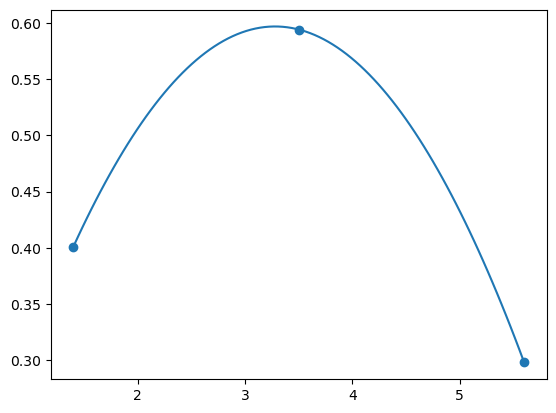

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
import urllib


if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Parabolico.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
if not path.exists(file):
    Path_ =urllib.request.urlretrieve(url, filename)
    
else:
    Path_ = file
    
Data = pd.read_csv(Path_)
X = np.float64(Data.X)
Y = np.float64(Data.Y)


def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)
plt.scatter(X,Y)
plt.plot(x,y)


In [9]:
x = sym.Symbol('x',real=True)
r = Interpolate(x,X,Y)
r = sym.simplify(r)
r

x*(0.363970234266202 - 0.0554912422401579*x)

Por otro lado, se tiene que la función de la trayectoria de un proyectil va a estar dada por $$(x,y) = \left( x, x\tan \theta  - \frac{g}{2v_o^2\cos^2 \theta}x^2\right)$$
Por lo solo se tendrían que manipular los coeficientes para obtener lo que se necesita.

In [10]:
r = sym.Poly(r)
coeff = np.array(r.all_coeffs())

In [11]:
theta = np.arctan(float(coeff[1]))
g = -9.8
v_0 = np.sqrt(g/(2*float(coeff[0])*np.cos(theta)**2))
round(np.degrees(theta),2),round(v_0,2)

(20.0, 10.0)

**Problema: 5.**

In [12]:
if not path.exists('Data'):
    os.mkdir('Data')
    
filename = 'Data/InterpolacionNewtonNoequi.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
if not path.exists(file):
    Path_ =urllib.request.urlretrieve(url, filename)
    
else:
    Path_ = filename
    
Data = pd.read_csv(Path_)
X = np.float64(Data.X)
Y = np.float64(Data.Y)
xt = np.linspace(X[0],X[-1],100)
X,Y

(array([0. , 1.5, 2. , 3.8, 4.2, 5.9]),
 array([-18., -13.,   0.,   5.,   3.,  10.]))

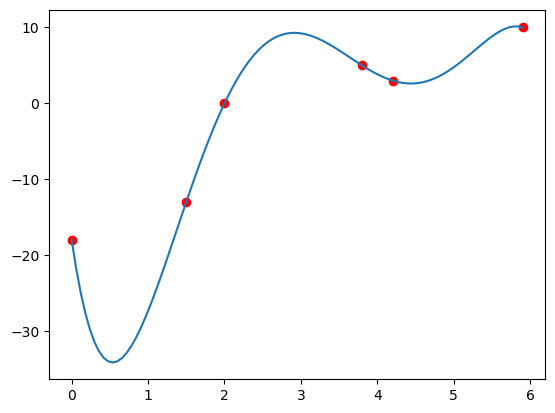

In [13]:
def newton_gregory(x, y, x_new):
    n = len(x)
    # Initialize the divided difference table with y values
    div_diff_table = np.zeros((n, n))
    div_diff_table[:, 0] = y

    # Calculate the divided differences recursively
    for j in range(1, n):
        for i in range(n-j):
            div_diff_table[i][j] = (div_diff_table[i+1][j-1] - div_diff_table[i][j-1]) / (x[i+j] - x[i])

    # Use the divided difference table to interpolate the polynomial
    y_new = np.zeros_like(x_new)
    for i, x_val in enumerate(x_new):
        y_val = div_diff_table[0][0]
        for j in range(1, n):
            term = div_diff_table[0][j]
            for k in range(j):
                term *= (x_val - x[k])
            y_val += term
        y_new[i] = y_val

    return y_new


yt = newton_gregory(X,Y,xt)

plt.scatter(X,Y,color='r',marker='o')
plt.plot(xt,yt)

## Integración
**Problema: 1.**

Se tiene en primera instancia que $$f(x) \approx p_1(x) = \frac{x-b}{a-b}f(a) + \frac{x-a}{b-a}f(b) $$
Tomando la integral de $f$ se tiene 
\begin{align*}
I = \int_{a}^{b} f(x) \ dx &\cong \int_{a}^{b} p_1(x)\ dx \\
&= \int_{a}^{b} \frac{x-b}{a-b}f(a) + \frac{x-a}{b-a}f(b) \ dx \\
&= \frac{1}{b-a} \int_{a}^{b} (x-a)f(b) - (x-b)f(a)\ dx \\
&= \frac{1}{b-a} \int_{a}^{b} (f(b)-f(a))x + bf(a) - af(b) \ dx \\
&= \frac{1}{b-a}\bigg[(f(b)-f(a))\frac{x^2}{2} + (bf(a) - af(b))x\bigg]_{x = a}^{x=b}\\
&= \frac{1}{b-a}\bigg[\frac{f(b)-f(a)}{2}(b^2-a^2) + (bf(a) - af(b))(b-a)\bigg]\\
&= \frac{f(b)-f(a)}{2}(a+b) + bf(a) - af(b)\\
&= \frac{(f(b)-f(a))(a+b)+2bf(a)-2af(b)}{2}\\
&= \frac{bf(b)+af(b)-bf(a)-af(a) + 2bf(a)-2af(b)}{2}\\
&= \frac{bf(a) - af(b) + bf(b)-af(a)}{2}\\
&= \frac{(b-a)f(a)+(b-a)f(b)}{2}\\
&= \frac{f(a)+f(b)}{2}(b-a)
\end{align*}

**Problema: 3.**

Se tiene $$f(x) \cong \frac{(x-b)(x-x_m)}{(a-b)(a-x_m)}f(a) + \frac{(x-a)(x-b)}{(x_m-a)(x_m-b)}f(x_m)+\frac{(x-a)(x-x_m)}{(b-a)(b-x_m)}f(b)$$
Por lo que $$\int_{a}^{b} f(x)\ dx = \int_{a}^{b} \frac{(x-b)(x-x_m)}{(a-b)(a-x_m)}f(a) + \frac{(x-a)(x-b)}{(x_m-a)(x_m-b)}f(x_m)+\frac{(x-a)(x-x_m)}{(b-a)(b-x_m)}f(b)\ dx = I_1 + I_2 + I_3$$

Se tiene primero, para $I_1$:
\begin{align*}
    \int_{a}^{b} \frac{(x-b)(x-x_m)}{(a-b)(a-x_m)}f(a)\ dx &= \frac{f(a)}{(a-b)(a-x_m)}\int_{a}^{b} (x-b)(x-x_m)\ dx\\
    &= \frac{f(a)}{(a-b)(a-x_m)} \int_{a}^{b} x^2 - (b+x_m)x + bx_m \ dx \\
    &=\frac{f(a)}{(a-b)(a-x_m)} \bigg[ \frac{b^3-a^3}{3} - \frac{(b-x_m)}{2}(b^2-a^2)  + x_mb(b-a)\bigg]\\
    &= \frac{-f(a)}{(a-x_m)}\bigg[ \frac{b^2 + ab +a^2}{3} - \frac{(b-x_m)}{2}(b+a)  + x_mb\bigg]
\end{align*}

**Problema: 7.**

La suma de los pequeños primas bajo el cascarón es: 2.094388378863261


<IPython.core.display.Javascript object>


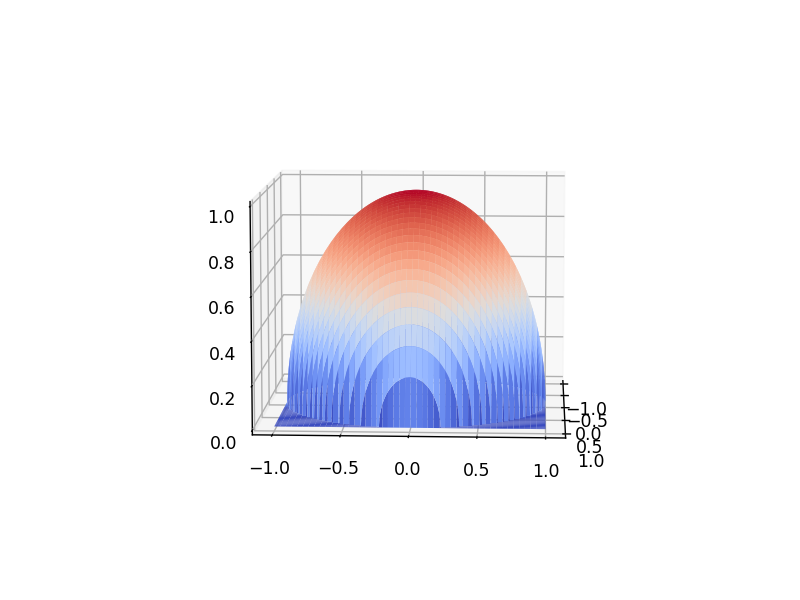

In [61]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import sympy as sym
from scipy.integrate import quad
from scipy.integrate import dblquad

R = 1
n = 1000
x = np.linspace(-R,R,n+1)
y = np.linspace(-R,R,n+1)

a = 0.
b = x[-1]
A = (x[1] - x[0])*(y[1]-y[0])


def f(x,y,R=1.):
    
    z = R**2 - x**2 - y**2
    
    if z <= 0.:
        return 0.
    else:
        return np.sqrt(z)

X,Y = np.meshgrid(x,y)
Sum = 0
for i in range(len(x)-1):
    for j in range(len(y)-1):
        z_prom = (f(x[i],y[j])+f(x[i+1],y[j])+f(x[i+1],y[j+1])+f(x[i],y[j+1]))/4
        Sum += z_prom*A
print("La suma de los pequeños primas bajo el cascarón es: %s"%(Sum))

f = np.vectorize(f)
Z = f(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap='coolwarm')

**Problema: 14**
Usando resultados del álgebra lineal, se tendrá que el polinomio $f(x)= x^2 +5x +3$ puede escribirse como una combinación lineal de los vectores de la base del espacio vectorial $P_2(\mathbb{R})$, así:
$$a_0 p_0(x) + a_1p_1(x) + a_2p_2(x) = 3 + 5x + x^2$$ donde $$a_i = \frac{\langle f | p_i\rangle}{\langle p_i | p_i\rangle}$$
donde $$\langle f | g \rangle = \int_{-1}^{1}f g \ dx$$

In [59]:
import sympy as sym
x = sym.Symbol("x",real=True)
f = 3 + 5*x + x**2
legendre = []
coeffs = []
poli = []

def inner_prod(f,g):
    return sym.integrate(f*g,(x,-1,1))

for i in range(3):
    legendre.append(sym.functions.special.polynomials.legendre(i, x))
    
for j in range(len(legendre)):
    coeffs.append(inner_prod(legendre[j],f)/inner_prod(legendre[j],legendre[j]))

coeffs

[10/3, 5, 2/3]

Por lo que el polinomio se escribe en esta base como $$\frac{10}{3}p_0 + 5p_1 + \frac{2}{3}p_2 $$

**Problema: 14.a.**

In [19]:
#definición de la función
x=sym.Symbol('x',real=True)
def funcion(x):
    return (x**3)/((np.e**(-x))*((np.e**x) -1))


def black_body_integral(n):
    Roots,Weights=np.polynomial.laguerre.laggauss(n)
    black_body=0
    
    for every in range(0,len(Roots)):
        valor= (Weights[every]* funcion(Roots[every]))
        black_body+=valor
    return black_body

black_body_radiation=black_body_integral(3)
print("La integral es de: ", black_body_radiation)

La integral es de:  6.481130171540027


**Problema: 14.b.**

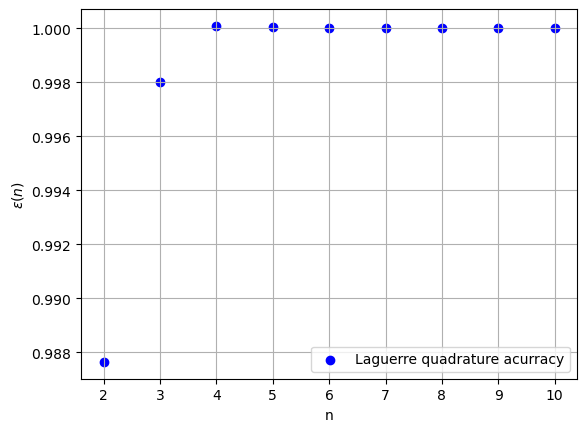

In [29]:
valor_teorico=(np.pi**4)/15

val=[]
lista_n=np.array((2,3,4,5,6,7,8,9,10))

for every in lista_n:
    black_body_radiation=black_body_integral(every)
    error = black_body_radiation/valor_teorico
    val.append(error)
    


plt.scatter(lista_n,val,color='b',label='Laguerre quadrature acurracy')
plt.legend()
plt.xlabel('n')
plt.ylabel(r'$\epsilon(n)$')
plt.grid()


